# Likelihood

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def likelihood(x, y, model, sigma, theta):
    suma = 0
    for i in range(len(x)):
        suma += (y[i] - model(x[i], theta))**2 / sigma[i]**2
    return -(1/2) * suma

In [26]:
# Define the model
def line(x, theta):
    return x*theta[0]+theta[1]

In [27]:
def montecarlo(x, y, model, sigmaY, initPoints, pasosTotales, sigmaX):
    np.random.seed(500)
    markovMatrix = []
    markovChain = []
    for point in initPoints:
        p_old = point
        L_old = likelihood(x, y, line, sigmaY, p_old)
        markovChain = [[p_old, L_old]]
        rechazado = []
        
        for paso in range(pasosTotales):
            rechazado.append(0)
            p_new = [p_old[0] + sigmaX[0] * np.random.randn(), p_old[1] + sigmaX[1] * np.random.randn()]
            L_new = likelihood(x, y, line, sigmaY, p_new)

            if (L_new > L_old):
                markovChain.append([p_new, L_new])
                p_old = p_new
                L_old = L_new
            elif (np.exp(L_new) / np.exp(L_old) > np.random.randn()):
                markovChain.append([p_new, L_new])
                p_old = p_new
                L_old = L_new
            else:
                markovChain.append([p_new, L_new])
                rechazado[paso] += 1
        
        markovMatrix.append(markovChain)
            
    return [markovMatrix, rechazado]
    

In [29]:
theta = [10, 12]
sigmaX = [0.1, 0.1]

x = np.linspace(0, 10, 1000)
y = x*theta[0]+theta[1]
sigmaY = [0.1 for point in y]
initPoints = [[5, 10],[7, 13], [15, 13], [15, 7], [7, 7]]

chain = montecarlo(x, y, line, sigmaY, initPoints, 500, sigmaX)
ajuste = chain[0]

<ipython-input-27-300b2623805b>:20: RuntimeWarning: invalid value encountered in double_scalars
  elif (np.exp(L_new) / np.exp(L_old) > np.random.randn()):


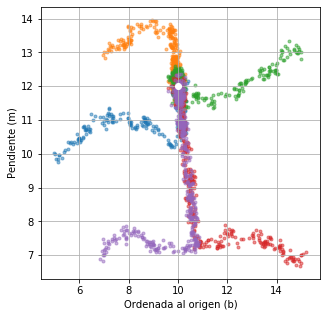

In [30]:
fig, ax0 = plt.subplots(figsize=(5, 5))
for cadenita in ajuste:
    x = [punto[0] for punto, likelihood in cadenita]
    y = [punto[1] for punto, likelihood in cadenita]
    likelihoods = [likelihood for punto, likelihood in cadenita]
    chain_plot = ax0.scatter(x, y, marker = '.', alpha = 0.5)
    
plt.plot(theta[0], theta[1], marker = 'o', label = 'Valor real', c = 'White')
ax0.set_ylabel('Pendiente (m)')
ax0.set_xlabel('Ordenada al origen (b)') 

ax0.grid()